In [1]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1,l1_l2,l2
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import os
from collections import Counter
import numpy as np
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.multiclass import unique_labels

# from vis.utils import utils
from tensorflow.keras.activations import elu,relu 

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling1D,GlobalAveragePooling2D
from tensorflow.keras.layers import Embedding, Flatten, Input, add,concatenate

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from neural_net import build_model,build_and_train
import hyperopt_optimize


Found 30800 images belonging to 4 classes.
Found 13200 images belonging to 4 classes.


In [2]:
hyperspace= {
        "activation": "elu",
        "batch_size": 32.0,
        "conv_dropout_drop_proba": 0.22589147387264716,
        "conv_hiddn_units_mult": 0.9154063396651158,
        "conv_kernel_size": 3.0,
        "conv_pool_res_start_idx": 0.0,
        "fc_dropout_drop_proba": 0.16221193175787366,
        "fc_units_1_mult": 0.57102574765157,
        "first_conv": 4,
        "l2_weight_reg_mult": 0.3582628724536004,
        "lr_rate_mult": 0.7911672100953749,
        "nb_conv_pool_layers": 2,
        "one_more_fc": 1.0097837259669704,
        "optimizer": "SGD",
        "pooling_type": "inception",
        "res_conv_kernel_size": 4.0,
        "residual": 1.0,
        "use_BN": True
    }
model=build_model(hyperspace)


Hyperspace:
{'activation': 'elu', 'batch_size': 32.0, 'conv_dropout_drop_proba': 0.22589147387264716, 'conv_hiddn_units_mult': 0.9154063396651158, 'conv_kernel_size': 3.0, 'conv_pool_res_start_idx': 0.0, 'fc_dropout_drop_proba': 0.16221193175787366, 'fc_units_1_mult': 0.57102574765157, 'first_conv': 4, 'l2_weight_reg_mult': 0.3582628724536004, 'lr_rate_mult': 0.7911672100953749, 'nb_conv_pool_layers': 2, 'one_more_fc': 1.0097837259669704, 'optimizer': 'SGD', 'pooling_type': 'inception', 'res_conv_kernel_size': 4.0, 'residual': 1.0, 'use_BN': True}
0
36
(None, 224, 224, 16)
(None, 224, 224, 36)
(None, 224, 224, 36)
(None, 112, 112, 45)
1
72
(None, 112, 112, 45)
(None, 112, 112, 72)
(None, 112, 112, 72)
(None, 56, 56, 87)
(None, 272832)
(None, 571)
(None, 757)


In [3]:
validation_gen=ImageDataGenerator()
validation_path="/home/kashraf/Journal_work_Fall2021/GAN_topomap/topos_GAN+REAL/stack/train_test/test/"
img_rows, img_cols = 224,224
validation_generator = validation_gen.flow_from_directory(
    validation_path,
    color_mode="rgb",

    target_size=(img_rows, img_cols),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


Found 13200 images belonging to 4 classes.


In [4]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 16) 784         lambda[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 36) 5220        conv2d[0][0]                     
______________________________________________________________________________________________

### Training model for beta

In [5]:
model, model_name, result, log_path=build_and_train(hype_space=hyperspace,save_best_weights=True)

Hyperspace:
{'activation': 'elu', 'batch_size': 32.0, 'conv_dropout_drop_proba': 0.22589147387264716, 'conv_hiddn_units_mult': 0.9154063396651158, 'conv_kernel_size': 3.0, 'conv_pool_res_start_idx': 0.0, 'fc_dropout_drop_proba': 0.16221193175787366, 'fc_units_1_mult': 0.57102574765157, 'first_conv': 4, 'l2_weight_reg_mult': 0.3582628724536004, 'lr_rate_mult': 0.7911672100953749, 'nb_conv_pool_layers': 2, 'one_more_fc': 1.0097837259669704, 'optimizer': 'SGD', 'pooling_type': 'inception', 'res_conv_kernel_size': 4.0, 'residual': 1.0, 'use_BN': True}
0
36
(None, 224, 224, 16)
(None, 224, 224, 36)
(None, 224, 224, 36)
(None, 112, 112, 45)
1
72
(None, 112, 112, 45)
(None, 112, 112, 72)
(None, 112, 112, 72)
(None, 56, 56, 87)
(None, 272832)
(None, 571)
(None, 757)
Model's weights will be saved to: /home/kashraf/Journal_work_Fall2021/modelling/real_gan_models/thesis results and figures/saved_weights/9c07f_theta_gan_real_hyp_NOv1.h5
Epoch 1/100
1925/1925 [==============================] - 292s

1925/1925 [==============================] - 291s 151ms/step - loss: 0.6299 - accuracy: 0.9733 - val_loss: 4.5271 - val_accuracy: 0.5913
Epoch 50/100
1925/1925 [==============================] - 291s 151ms/step - loss: 0.6284 - accuracy: 0.9732 - val_loss: 1.8622 - val_accuracy: 0.7660
Epoch 51/100
1925/1925 [==============================] - 291s 151ms/step - loss: 0.6224 - accuracy: 0.9748 - val_loss: 2.8190 - val_accuracy: 0.6999
Epoch 52/100
1925/1925 [==============================] - 291s 151ms/step - loss: 0.6261 - accuracy: 0.9741 - val_loss: 2.6912 - val_accuracy: 0.7439
Epoch 53/100
1925/1925 [==============================] - 290s 151ms/step - loss: 0.6181 - accuracy: 0.9762 - val_loss: 2.5680 - val_accuracy: 0.7564
Epoch 54/100
1925/1925 [==============================] - 291s 151ms/step - loss: 0.6138 - accuracy: 0.9785 - val_loss: 3.6737 - val_accuracy: 0.5957
Epoch 55/100
1925/1925 [==============================] - 291s 151ms/step - loss: 0.6079 - accuracy: 0.9799 - val

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


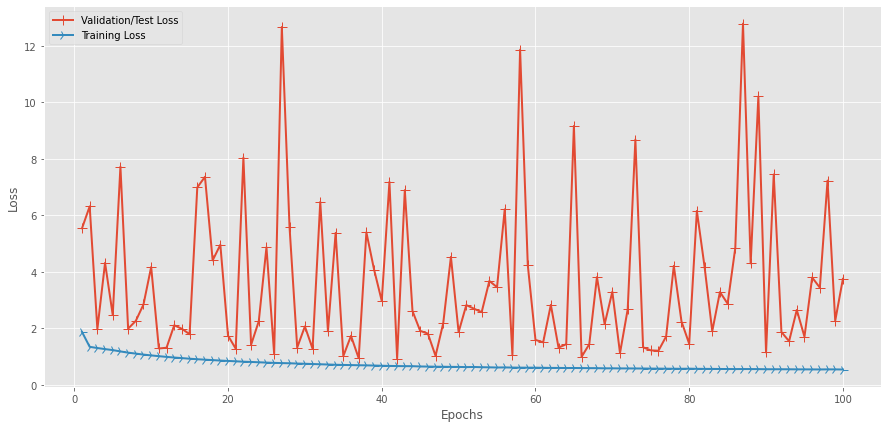

In [6]:
results_path="/home/kashraf/Journal_work_Fall2021/modelling/real_gan_models/thesis results and figures/"
history=result["history"]

print(history.keys())
# Plotting our loss charts
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(15,7))
history_dict = history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.savefig(results_path+'theta_gan_&_real_Loss.png', dpi = 1200)
plt.show()


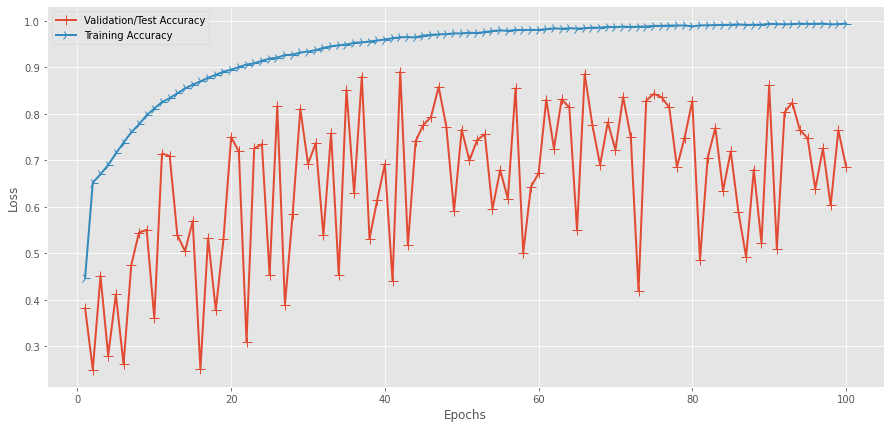

In [7]:
plt.style.use("ggplot")
plt.figure(figsize=(15,7))
history_dict = history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.savefig(results_path+'theta_gan_&_real_Accuracy.png', dpi = 1200)
plt.show()



 Classification report: 
               precision    recall  f1-score   support

        CL_1       0.18      0.00      0.00      3300
        CL_2       0.24      0.14      0.18      3300
        CL_3       0.24      0.81      0.37      3300
        CL_4       0.17      0.01      0.02      3300

    accuracy                           0.24     13200
   macro avg       0.21      0.24      0.14     13200
weighted avg       0.21      0.24      0.14     13200



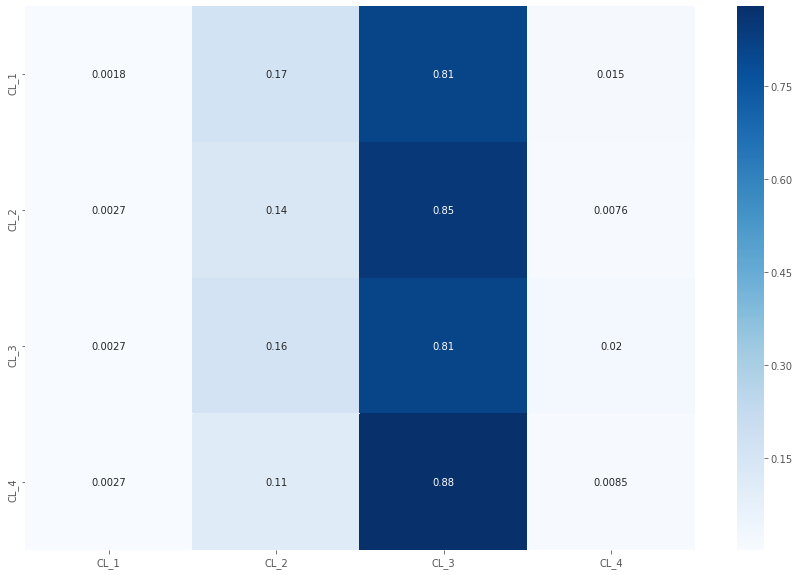

In [8]:
import seaborn as sr
import pandas as pd

y_pred=np.argmax(model.predict(validation_generator), axis=1)
y_test=validation_generator.classes

plt.style.use("ggplot")
# y_predict,distances1=  face_recognition(x_test_recog,T_distance)
# accuracy=accuracy_score(y_test_recog,y_predict)
class_names=["CL_1","CL_2","CL_3","CL_4"]
report=classification_report(y_test,y_pred,target_names=class_names)
np.save(results_path+"theta_real_gan_report.npy",report)

conf=confusion_matrix(y_test,y_pred,normalize="true")
conf_df=pd.DataFrame(conf, index=class_names, columns=class_names)
# print("\nFace  accuracy =",accuracy)
print("\n Classification report: \n",report)
fig=plt.figure(figsize=(15,10))
sr.heatmap(conf_df,annot=True,cmap="Blues")
# plt.title("Confusion matrix")
plt.savefig(results_path+"Confusion matrix_theta_gan_&_real.png")
plt.show()